# Import Libraries

In [1]:
# install needed libraries
!pip install split_folders
!pip install sklearn

In [2]:
# import libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import zipfile
import os
import splitfolders

from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from google.colab import files
from keras.preprocessing import image

In [3]:
# print tensorflow version
print(tf.__version__)

2.5.0


# Download dataset

In [4]:
# download dataset
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-06-23 14:19:33--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  6.45MB/s    in 62s     

2021-06-23 14:20:36 (4.99 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



# Extract Dataset

In [5]:
# zip and unzipping
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [6]:
os.listdir('/tmp/rockpaperscissors')

print('Number of Rock images: ', len(os.listdir('/tmp/rockpaperscissors/rock/')))
print('Number of Paper images: ', len(os.listdir('/tmp/rockpaperscissors/paper/')))
print('Number of Scissors images: ', len(os.listdir('/tmp/rockpaperscissors/scissors/')))

Number of Rock images:  726
Number of Paper images:  712
Number of Scissors images:  750


# Split Dataset

In [7]:
# splitting folder
base_dir = '/tmp/rockpaperscissors/rps-cv-images'
splitfolders.ratio(base_dir, 
                   output = '/tmp/rockpaperscissors', 
                   seed=1, ratio=(.6, .4))

train_dir = os.path.join("/tmp/rockpaperscissors", "train")
val_dir = os.path.join("/tmp/rockpaperscissors", "val")

Copying files: 2188 files [00:00, 4223.67 files/s]


In [8]:
# splitting base folder

paper_dir = os.path.join(base_dir, 'paper')
rock_dir = os.path.join(base_dir, 'rock')
scissors_dir = os.path.join(base_dir, 'scissors')

train_paper_dir, val_paper_dir = train_test_split (os.listdir (paper_dir), test_size = 0.4)
train_rock_dir, val_rock_dir = train_test_split (os.listdir (rock_dir), test_size = 0.4)
train_scissors_dir, val_scissors_dir = train_test_split (os.listdir (scissors_dir), test_size = 0.4)


train_paper = os.path.join(train_dir, 'paper')
val_paper = os.path.join(val_dir, 'paper')

train_rock = os.path.join(train_dir, 'rock')
val_rock = os.path.join(val_dir, 'rock')

train_scissors = os.path.join(train_dir, 'scissors')
val_scissors = os.path.join(val_dir, 'scissors')

In [9]:
# splitting train and validation datagen

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 30,
    width_shift_range = 0.1,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest')

val_datagen = ImageDataGenerator(
                    rescale = 1./255,
                    rotation_range = 20,
                    horizontal_flip = True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [10]:
# splitting train and validation datagen

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size = (150,150),
        batch_size = 128,
        class_mode = 'categorical')

val_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size = (150,150),
        batch_size = 128,
        class_mode = 'categorical')

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [11]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       7

In [12]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [13]:
history = model.fit(
          train_generator,
          epochs = 20,
          validation_data = val_generator,
          verbose = 1)

Epoch 1/20
11/11 [==============================] - 48s 1s/step - loss: 1.1551 - accuracy: 0.3438 - val_loss: 1.0974 - val_accuracy: 0.3790
Epoch 2/20
11/11 [==============================] - 13s 1s/step - loss: 1.0949 - accuracy: 0.3666 - val_loss: 1.0854 - val_accuracy: 0.4178
Epoch 3/20
11/11 [==============================] - 13s 1s/step - loss: 1.0436 - accuracy: 0.4451 - val_loss: 1.0120 - val_accuracy: 0.4292
Epoch 4/20
11/11 [==============================] - 13s 1s/step - loss: 1.0043 - accuracy: 0.4954 - val_loss: 0.9449 - val_accuracy: 0.6941
Epoch 5/20
11/11 [==============================] - 13s 1s/step - loss: 0.9449 - accuracy: 0.5686 - val_loss: 0.7601 - val_accuracy: 0.7626
Epoch 6/20
11/11 [==============================] - 13s 1s/step - loss: 0.8135 - accuracy: 0.6547 - val_loss: 0.5815 - val_accuracy: 0.8790
Epoch 7/20
11/11 [==============================] - 13s 1s/step - loss: 0.6314 - accuracy: 0.7462 - val_loss: 0.3154 - val_accuracy: 0.9121
Epoch 8/20
11/11 [==

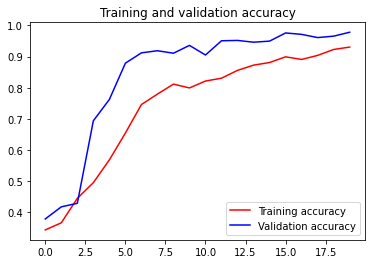

<Figure size 432x288 with 0 Axes>

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

# Evaluate Model

In [15]:
validation_generator = val_datagen.flow_from_directory(
    val_dir,
    batch_size=159,
    class_mode='categorical',
    target_size=(150, 150),
    shuffle = False
)

filenames = validation_generator.filenames
nb_samples = len(filenames)

Y_pred = model.predict_generator(validation_generator, steps = nb_samples)
y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))

print('Classification Report')
target_names = ['Rock', 'Paper', 'Scissors']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

Found 876 images belonging to 3 classes.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2001: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Confusion Matrix
[[267   4  14]
 [  1 289   1]
 [  1   0 299]]
Classification Report
              precision    recall  f1-score   support

        Rock       0.99      0.94      0.96       285
       Paper       0.99      0.99      0.99       291
    Scissors       0.95      1.00      0.97       300

    accuracy                           0.98       876
   macro avg       0.98      0.98      0.98       876
weighted avg       0.98      0.98      0.98       876



# Using Transfer Learning or InceptionV3

In [16]:
tf.keras.backend.clear_session()

pre_trained_model = InceptionV3(
    input_shape = (150, 150, 3),
    include_top = False, 
    weights = 'imagenet'
)

87916544/87910968 [==============================] - 1s 0us/step


In [17]:
for layer in pre_trained_model.layers:
  layer.trainable = False
  
last_layer = pre_trained_model.get_layer('mixed7')

last_output = last_layer.output

x = tf.keras.layers.Flatten()(last_output)
x = tf.keras.layers.Dropout(0.4)(x) 
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)                  
x = tf.keras.layers.Dense(3, activation='softmax')(x)           

model_inception = tf.keras.Model(pre_trained_model.input, x)

# Callbacks

In [18]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', 
    factor=0.2,
    patience=5, 
    min_lr=1.5e-5 )

early_stop = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=12,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=True)

In [19]:
model_inception.compile(
    optimizer = 'adam', 
    loss = 'categorical_crossentropy', 
    metrics = ['accuracy'])

history_inception = model_inception.fit(
    train_generator,
    epochs=10,
    callbacks = [reduce_lr, early_stop],
    verbose=1,
    validation_data=validation_generator)

Epoch 1/10
11/11 [==============================] - 20s 2s/step - loss: 1.0653 - accuracy: 0.6258 - val_loss: 0.1373 - val_accuracy: 0.9566
Epoch 2/10
11/11 [==============================] - 13s 1s/step - loss: 0.2207 - accuracy: 0.9223 - val_loss: 0.0554 - val_accuracy: 0.9829
Epoch 3/10
11/11 [==============================] - 13s 1s/step - loss: 0.1193 - accuracy: 0.9649 - val_loss: 0.0279 - val_accuracy: 0.9920
Epoch 4/10
11/11 [==============================] - 14s 1s/step - loss: 0.1341 - accuracy: 0.9627 - val_loss: 0.0342 - val_accuracy: 0.9920
Epoch 5/10
11/11 [==============================] - 13s 1s/step - loss: 0.0918 - accuracy: 0.9657 - val_loss: 0.0141 - val_accuracy: 0.9977
Epoch 6/10
11/11 [==============================] - 13s 1s/step - loss: 0.0798 - accuracy: 0.9733 - val_loss: 0.0201 - val_accuracy: 0.9897
Epoch 7/10
11/11 [==============================] - 13s 1s/step - loss: 0.0422 - accuracy: 0.9855 - val_loss: 0.0146 - val_accuracy: 0.9932
Epoch 8/10
11/11 [==

In [20]:
validation_generator = val_datagen.flow_from_directory(
    val_dir,
    batch_size=159,
    class_mode='categorical',
    target_size=(150, 150),
    shuffle = False
)

filenames = validation_generator.filenames
nb_samples = len(filenames)

Y_pred = model_inception.predict_generator(validation_generator, steps = nb_samples)
y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))

print('Classification Report')
target_names = ['Rock', 'Paper', 'Scissors']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

Found 876 images belonging to 3 classes.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2001: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Confusion Matrix
[[283   1   1]
 [  0 291   0]
 [  1   1 298]]
Classification Report
              precision    recall  f1-score   support

        Rock       1.00      0.99      0.99       285
       Paper       0.99      1.00      1.00       291
    Scissors       1.00      0.99      0.99       300

    accuracy                           1.00       876
   macro avg       1.00      1.00      1.00       876
weighted avg       1.00      1.00      1.00       876



In [21]:
model_inception.save_weights('model_inception_weights.h5')
model_inception.save('model_inception.h5')

In [22]:
def predict_image(image_upload, model = model_inception):
  im = image_upload
  im_array = np.asarray(im)
  im_array = im_array*(1/225)
  im_input = tf.reshape(im_array, shape = [1, 150, 150, 3])

  predict_array = model.predict(im_input)[0]

  import pandas as pd
  df = pd.DataFrame(predict_array)
  df = df.rename({0:'Probability'}, axis = 'columns')
  prod = ['Paper', 'Rock', 'Scissors']
  df['Product'] = prod
  df = df[['Product', 'Probability']]

  predict_label = np.argmax(model.predict(im_input))

  if predict_label == 0:
      predict_product = 'Paper'
  elif predict_label == 1:
      predict_product = 'Rock'
  else:
      predict_product = 'Scissor'

  return predict_product, df

Saving scissor-hands-260nw-202042048.jpg to scissor-hands-260nw-202042048.jpg




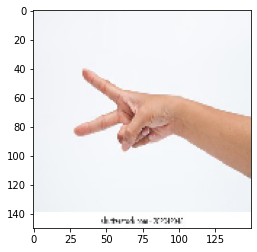


The image is detected as Scissor


    Product   Probability
0     Paper  5.183952e-10
1      Rock  6.994565e-11
2  Scissors  1.000000e+00




In [23]:
uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  img = np.vstack([x])

label, df = predict_image(img)

print('\n')
plt.show()
print("\nThe image is detected as " + label)
print('\n')
print(df)
print('\n')